In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

feature_names = data.feature_names
target_names = data.target_names

print("Feature names:", feature_names)
print("Target names:", target_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


In [3]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 455
Testing set size: 114


In [4]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
[[40  3]
 [ 3 68]]


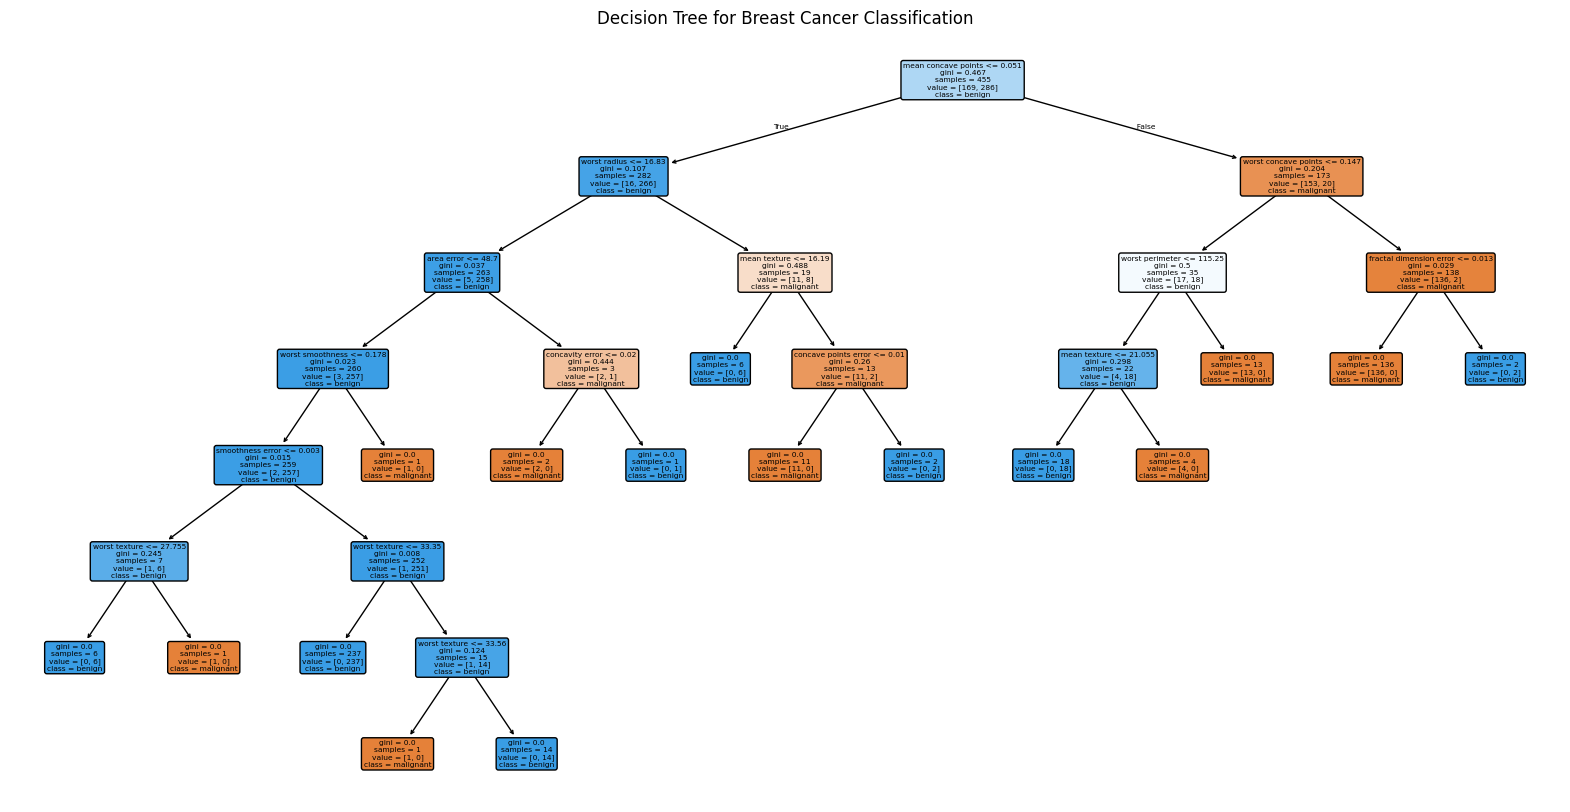

In [6]:
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf,
              feature_names=feature_names,
              class_names=target_names,
              filled=True,
              rounded=True)
plt.title("Decision Tree for Breast Cancer Classification")
plt.show()


Feature Importances:
                    Feature  Importance
7       mean concave points    0.691420
27     worst concave points    0.065651
1              mean texture    0.058478
20             worst radius    0.052299
22          worst perimeter    0.051494
19  fractal dimension error    0.018554
21            worst texture    0.017445
17     concave points error    0.015931
13               area error    0.011983
24         worst smoothness    0.009233
16          concavity error    0.006276
14         smoothness error    0.001237
2            mean perimeter    0.000000
3                 mean area    0.000000
12          perimeter error    0.000000
11            texture error    0.000000
10             radius error    0.000000
9    mean fractal dimension    0.000000
6            mean concavity    0.000000
8             mean symmetry    0.000000
4           mean smoothness    0.000000
5          mean compactness    0.000000
0               mean radius    0.000000
15        compactn

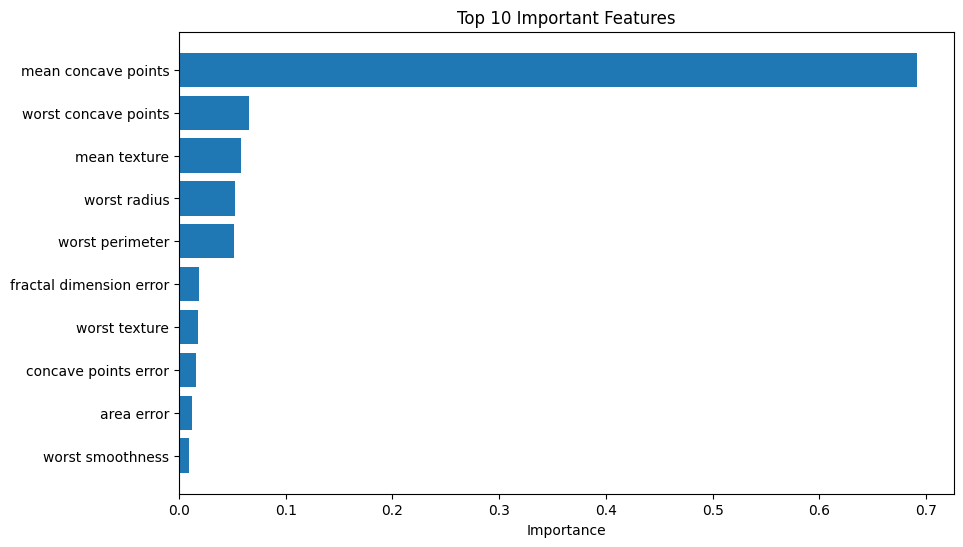

In [7]:
importances = clf.feature_importances_

import pandas as pd
feature_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False)

print("\nFeature Importances:")
print(feature_imp)

plt.figure(figsize=(10,6))
plt.barh(feature_imp['Feature'][:10], feature_imp['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

In [8]:
tuned_clf = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

tuned_clf.fit(X_train, y_train)
y_pred_tuned = tuned_clf.predict(X_test)

print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")

Tuned Model Accuracy: 0.95


<Figure size 800x600 with 0 Axes>

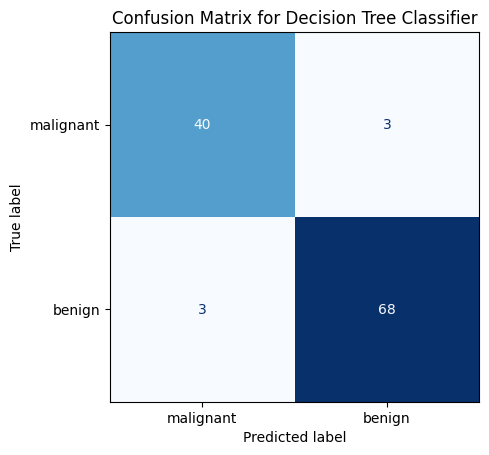

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=target_names,
    cmap=plt.cm.Blues,
    colorbar=False
)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.grid(False)
plt.show()